In [2]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [92]:

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
query = "SELECT * FROM Fires WHERE FIRE_SIZE_CLASS='G' OR FIRE_SIZE_CLASS='F' OR FIRE_SIZE_CLASS='E' OR FIRE_SIZE_CLASS='D';"


df = pd.read_sql_query(query,conn)




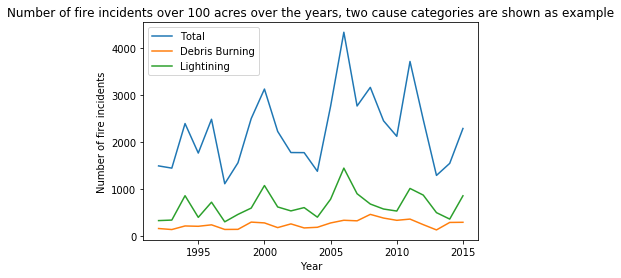

In [158]:


incidents = df['FIRE_YEAR'].tolist()
years = [i for i in range(min(incidents),max(incidents)+1)]

times = [incidents.count(i) for i in years ]
plt.xlabel('Year')
plt.ylabel('Number of fire incidents')
plt.title('Number of fire incidents over 100 acres over the years, two cause categories are shown as example')


plt.plot(years,times,label='Total')



incidents = df.loc[df['STAT_CAUSE_DESCR'] == 'Debris Burning']
incidents = incidents['FIRE_YEAR'].tolist()

years = [i for i in range(min(incidents),max(incidents)+1)]

times = [incidents.count(i) for i in years ]
plt.plot(years,times,label='Debris Burning')


incidents = df.loc[df['STAT_CAUSE_DESCR'] == 'Lightning']
incidents = incidents['FIRE_YEAR'].tolist()

years = [i for i in range(min(incidents),max(incidents)+1)]

times = [incidents.count(i) for i in years ]
plt.plot(years,times,label='Lightining')
plt.legend()


In [94]:
set(df['STAT_CAUSE_DESCR'].tolist())

{'Arson',
 'Campfire',
 'Children',
 'Debris Burning',
 'Equipment Use',
 'Fireworks',
 'Lightning',
 'Miscellaneous',
 'Missing/Undefined',
 'Powerline',
 'Railroad',
 'Smoking',
 'Structure'}

In [138]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [141]:
# DOY = Day of year

df['DISCOVERY_DOY']

spring = df.loc[df['DISCOVERY_DOY'] <= 1*365/4]
summer = df.loc[(df['DISCOVERY_DOY'] > 1*365/4) & (df['DISCOVERY_DOY'] <= 2*365/4)]
fall = df.loc[(df['DISCOVERY_DOY'] > 2*365/4) & (df['DISCOVERY_DOY'] <= 3*365/4)]
winter= df.loc[df['DISCOVERY_DOY'] > 3*365/4]



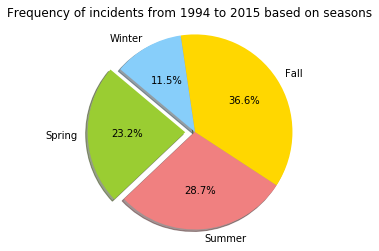

In [159]:
labels = 'Spring', 'Summer', 'Fall', 'Winter'
sizes = [len(spring), len(summer), len(fall), len(winter)]
colors = ['yellowgreen', 'lightcoral', 'gold', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.title('Frequency of incidents from 1994 to 2015 based on seasons')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()